In [1]:
#import necessary libraries
import pandas as pd
import nltk
import seaborn as sns
import sys # needed this for certain print options during debugging
import numpy as np #lmao why did we not have this before
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import json # since we have a json file this time as our dataset.
from IPython.display import display, HTML
import time
pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns = None

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()

In [3]:
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('Steam Game Review.csv')

In [4]:
# Data processing for removing stop words, lemmatization and stemmming, and english-only.
# Importing all relevant libraries and functions here
import spacy #load spacy
from sklearn.pipeline import Pipeline # pipelining pre-processing
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
tokenizer = nlp.tokenizer

2023-01-20 12:45:26.075520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#tokenization
def create_tokenized_dataset(data):
    tokens_list = []

    for j in data['user_review']:
#         tokens_list.append(word_tokenize(j))
        spacy_tokens = [token.orth_ for token in tokenizer(j)]
        tokens_list.append(spacy_tokens)
    data['Tokens'] = tokens_list   
    return data

df = create_tokenized_dataset(data)

In [6]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()
# nltk for removing english words
nltk.download('words')
words = set(nltk.corpus.words.words())
#define punctuation
custom_punc = ["``", "''", "--", "...","♥"]
punctuation = set(list(string.punctuation) + custom_punc)

[nltk_data] Downloading package words to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
#data preprocessing: define functions

# created a function to deal with that pesky steam heart emoticon
# print(ord('♥'))
def remove_steam_heart(tokens):
    for token in tokens:
        if len(token) == 1:
            if(ord(token) == 9829): # 9829 is the unicode for the heart emoticon
                tokens.remove(token)
    return tokens

#lower case
def lower_case(tokens):
    tokens = [token.lower() for token in tokens]
#     tokens  = list(map(lambda x: x.lower(), tokens))
    return tokens

#remove stopwords
def remove_stopwords(tokens):
#     tokens = [token for token in tokens if token not in stop_words]
# Using the spacy stop words set instead of the english stop words
    tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
    return tokens

#remove digits
def remove_digits(tokens):
    for token in tokens:
        if token.isdigit():
            tokens.remove(token)
    return tokens

#remove punctuation
def remove_punctuation(tokens):
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

#lemmatization
def lemmatize_words(tokens):
    for token in range(len(tokens)):
        tokens[token] = lemmatizer.lemmatize(tokens[token])
    return tokens

# Using nltk to word corpus to remove non-english words
# this method seemed cheaper and easier than spacy? maybe lol
def remove_non_english(tokens):
    tokens = [token for token in tokens if token in words]
    return tokens

In [8]:
#data preprocessing function
def data_preprocess(tokens):
    new_tokens = lower_case(tokens)
    new_tokens = remove_steam_heart(new_tokens)
    new_tokens = remove_non_english(new_tokens)
    new_tokens = remove_stopwords(new_tokens)
    new_tokens = remove_digits(new_tokens)
    new_tokens = remove_punctuation(new_tokens)
    new_tokens = lemmatize_words(new_tokens)
    return ' '.join(new_tokens)
    
# list_of_process_tokens = []
# for i in df['Tokens']:
#     list_of_process_tokens.append(data_preprocess(i))

In [9]:
df['ProcessTokens'] = df['Tokens'].apply(lambda x: data_preprocess(x))
df.sample(5)

review_id                       title    year  \
8205       11215                 Neverwinter  2014.0   
15196      22307                   Robocraft  2017.0   
12756      18253  RaceRoom Racing Experience  2016.0   
12785      18282  RaceRoom Racing Experience  2015.0   
15037      22148                   Robocraft  2018.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Printing most frequent words


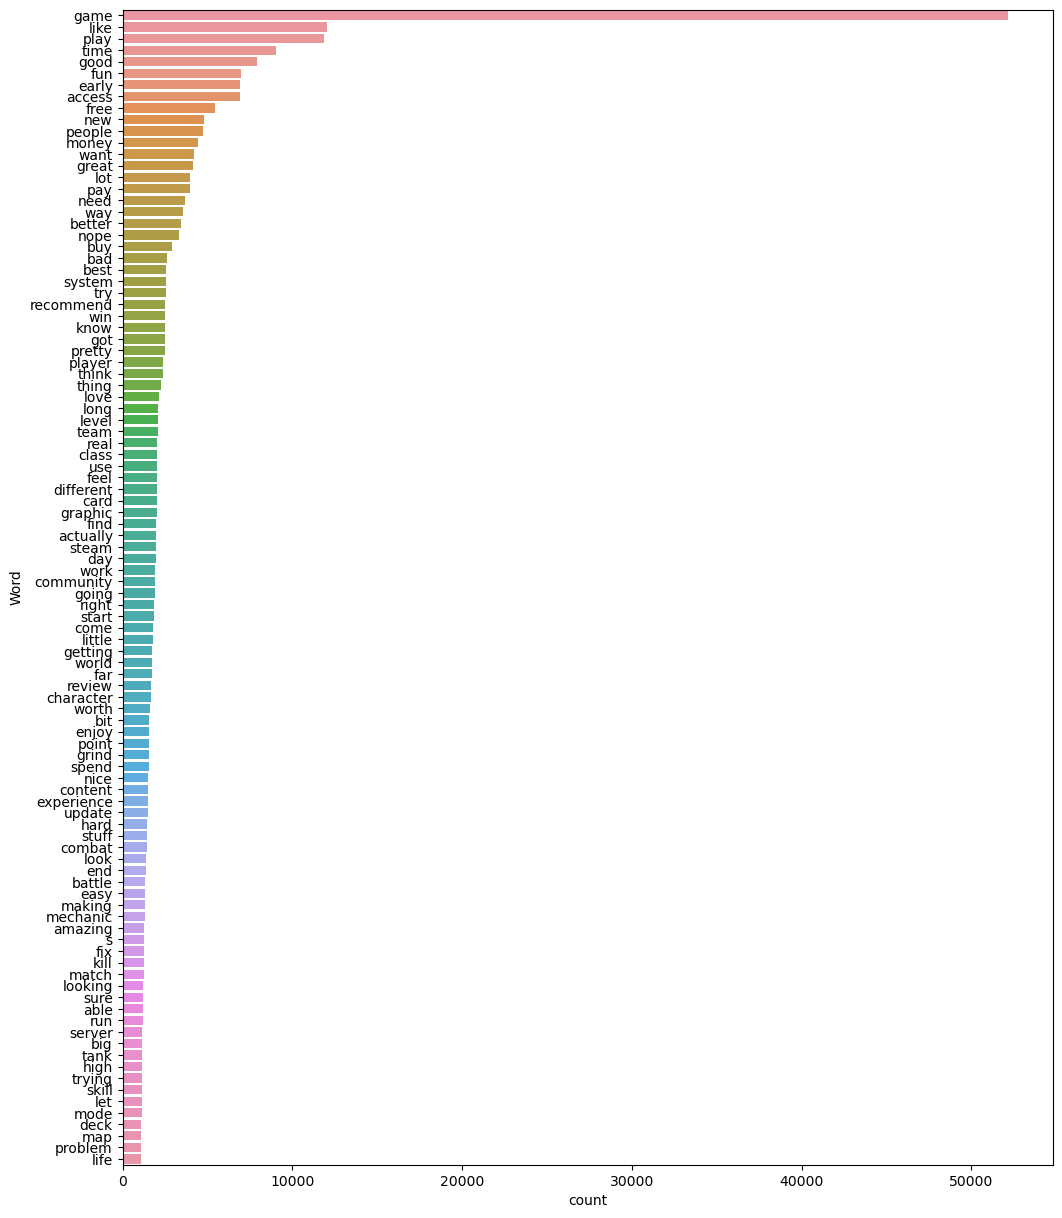

--- 1.9097583293914795 seconds ---


In [10]:
# print 100 most frequent words 
print("Printing most frequent words")
start_time = time.time()
freq_words(list(df['ProcessTokens']), 100)
print("--- %s seconds ---" % (time.time() - start_time))

In [11]:
df_new = df[['review_id','title','ProcessTokens', 'user_suggestion']].copy()
print("Creating new DataFrame with necessary columns")
print("---------------------------------------------")
df_new.sample(2)

Creating new DataFrame with necessary columns
---------------------------------------------


,review_id,title,ProcessTokens,user_suggestion
12656,18153,RaceRoom Racing Experience,hard control car corner recommend game seeking real life experience appropriate equipment steering wheel,0
7695,10705,Trove,game great casual game looking sit grind defeat fun combined great taking pretty large scale map building aspect fighting aspect need build upgrade plot land build building aspect feeling realm mad god,1


In [12]:
# removing any games that have keywords at all
prev_count = len(df.index)
df = df[df.ProcessTokens.notnull()]
new_count = len(df.index)
print("Removing all rows that do not have any keywords")
print("-----------------------------------------------")
print("Original Row Count = ", prev_count)
print("New Row Count = ", new_count)
print("Rows Removed = ",(prev_count - new_count))

Removing all rows that do not have any keywords
-----------------------------------------------
Original Row Count =  17494
New Row Count =  17494
Rows Removed =  0


In [13]:
# train test split before normalization
from sklearn.model_selection import train_test_split

X = df_new.drop(columns=['user_suggestion','review_id']).copy()
y = df_new['user_suggestion']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(13995, 2)
(13995,)
(1749, 2)
(1749,)
(1750, 2)
(1750,)


(None, None)

In [14]:
#Check for NaN-Values
print(pd.isna(X_train).values)
print(pd.isna(y_train).values)

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]
[False False False ... False False False]


In [15]:
#define text vectorizers (I used two different ones, later we can decide which one we should continue with)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [16]:
#text vectorization with count_vectorizer
#vectorization on train_dataset
np.set_printoptions(threshold=sys.maxsize)
def create_vectorized_dataset_count(data):
    list_of_count_vectors = []
    data = data.tolist() # converting to a list
    count_vector = count_vectorizer.fit_transform(data)
    count_array = count_vector.toarray()
#     Uncomment the two lines below to see the count vector with feature names
#     probably might also need to remove print truncation to see the whole thing.
    dftemp = pd.DataFrame(data=count_array,columns = count_vectorizer.get_feature_names())
    #return count_array # this is the 2d
    return count_vector

count_vector = create_vectorized_dataset_count(X_train['ProcessTokens']) # this becomes our count vectorization vector.
# we can use thhis to train our model.

/Users/soumyankar/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
#transform count test data

test_count_vector = count_vectorizer.transform(X_test['ProcessTokens'])
print("n_samples: %d, n_features: %d" % test_count_vector.shape)

n_samples: 1750, n_features: 12540


In [18]:
#Naive Bayes with count vector

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(count_vector, y_train)

y_prediction = naive_bayes_classifier.predict(test_count_vector)

print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_prediction)*100)

Multinomial Naive Bayes model accuracy(in %): 81.65714285714286


Accuracy :  0.8165714285714286


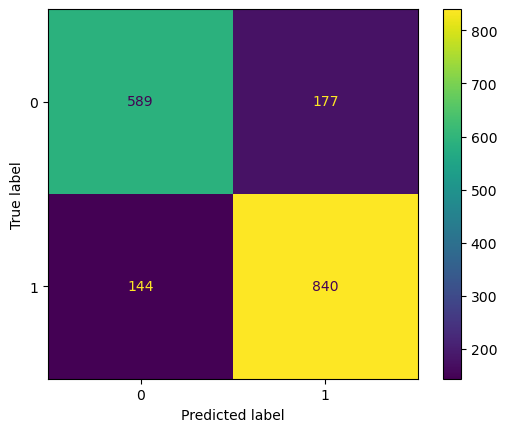

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_prediction))

# printing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=naive_bayes_classifier.classes_)
disp.plot()
plt.show()

In [24]:
# make a prediction
user_input = ["The game doesn't have the graphics that is shown on the preview.The cars in the game can not be controlled the always wipeout.DON'T spend the time on the game it is not worth it at all."]
user_count_vector = count_vectorizer.transform(user_input)
y_pred = naive_bayes_classifier.predict(user_count_vector)
print(y_pred.dt)

[1]
